In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [31]:
def ec_1(x):
    return x**3 - 5*x + 8

def ec_2(x):
    return x**3 - 15*x

def ec_3(x):
    return x**3 - 93*x

#Find the least number to be added to get a perfect square
#https://www.geeksforgeeks.org/least-number-to-be-added-to-or-subtracted-from-n-to-make-it-a-perfect-square/
def nearest(n):
    prevSquare = int(math.sqrt(n))
    nextSquare = prevSquare + 1
    prevSquare = prevSquare * prevSquare
    nextSquare = nextSquare * nextSquare
    return nextSquare - n

#https://www.geeksforgeeks.org/fraction-module-python/
def find_rational_point(p, q, max_iter):
    for a in range(max_iter):
        D=a**4/4+p*q
        sqrtD = math.sqrt(D)
        if sqrtD.is_integer():
                x1 = a**2/2 + math.sqrt(D)
                y1 = a*x1
                x2 = a**2/2 - math.sqrt(D)
                y2 = a*x2
                return [(x1, y1), (x2, y2), a, D]
    return None


In [38]:
print(find_rational_point(5,3,100000))
print(find_rational_point(7,3,100000))
print(find_rational_point(5,13,100000))
print(find_rational_point(7,11,100000))

print(15+23172**4/4)
print(math.sqrt(15+23172**4/4))

print(268470792*268470792)

[(536941584.0, 12442010384448.0), (0.0, 0.0), 23172, 7.207656615710728e+16]
[(7.0, 14.0), (-3.0, -6.0), 2, 25.0]
[(65.0, 520.0), (-1.0, -8.0), 8, 1089.0]
[(11.0, 22.0), (-7.0, -14.0), 2, 81.0]
7.207656615710728e+16
268470792.0
72076566157107264


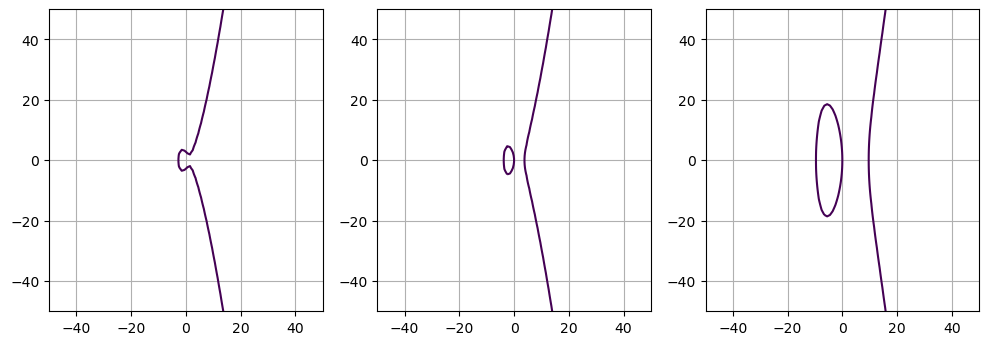

In [3]:
subplot_size=4
subplot_cols=3
subplot_rows=1

fig, ax = plt.subplots(subplot_rows, subplot_cols, figsize=(subplot_size*subplot_cols,subplot_size*subplot_rows), dpi=100)
ax = ax.flatten()

y, x = np.ogrid[-50:50:100j, -50:50:100j]
ax[0].contour(x.ravel(), y.ravel(), y**2 - ec_1(x), [0])
ax[0].grid()

ax[1].contour(x.ravel(), y.ravel(), y**2 - ec_2(x), [0])
ax[1].grid()

ax[2].contour(x.ravel(), y.ravel(), y**2 - ec_3(x), [0])
ax[2].grid()

plt.show()
